In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.set(style='whitegrid', palette='autumn')

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Dataset/market_basket/Market_Basket_Optimisation.csv',header=None, prefix='item_')
data.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_0   7501 non-null   object
 1   item_1   5747 non-null   object
 2   item_2   4389 non-null   object
 3   item_3   3345 non-null   object
 4   item_4   2529 non-null   object
 5   item_5   1864 non-null   object
 6   item_6   1369 non-null   object
 7   item_7   981 non-null    object
 8   item_8   654 non-null    object
 9   item_9   395 non-null    object
 10  item_10  256 non-null    object
 11  item_11  154 non-null    object
 12  item_12  87 non-null     object
 13  item_13  47 non-null     object
 14  item_14  25 non-null     object
 15  item_15  8 non-null      object
 16  item_16  4 non-null      object
 17  item_17  4 non-null      object
 18  item_18  3 non-null      object
 19  item_19  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
# Some items e.g asparagus appear multiple different ways due to whitespace
sorted(data.melt()['value'].dropna().unique())[:5]

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado']

In [ ]:
# remove trailing and leading whitespace e.g. ' asparagus' to 'asparagus'
for col in data.columns:
    data[col] = data[col].str.strip()
    
sorted(data.melt()['value'].dropna().unique())[:5]

['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food']

# 2. Analysing Transaction

## Summary

In [ ]:
print(f'There were a total of {data.shape[0]:,} transactions, involving items ranging from'
      + f' {data.shape[1]} to {data.notna().sum(axis=1).min()}.')

There were a total of 7,501 transactions, involving items ranging from 20 to 1.


## Product types

In [ ]:
all_items = data.melt()['value'].dropna()
print(f'There were {all_items.nunique()} different products:\n')
print(sorted(all_items.unique()))

There were 119 different products:

['almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons

## Most purchased product
Assuming that only one unit of each item was bought in each transaction, mineral water is the best selling product.

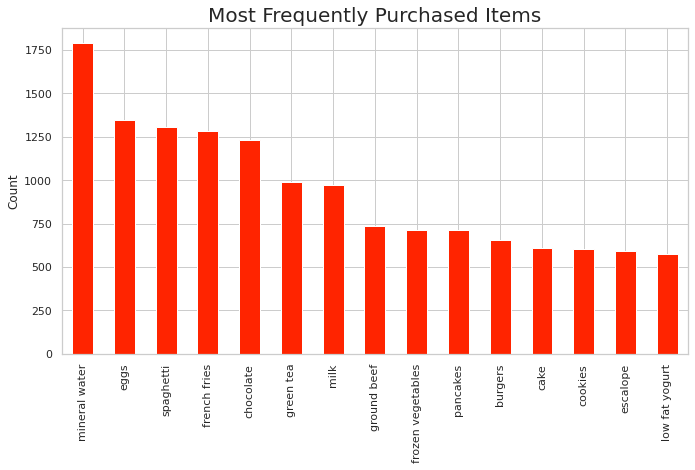

In [ ]:
ax = all_items.value_counts().head(15).plot(kind='bar')
ax.set_title('Most Frequently Purchased Items', size=20)
ax.set_ylabel('Count');

## Least purchased product
Assuming that only one unit of each item was bought in each transaction, water spray is the poorest performing item.

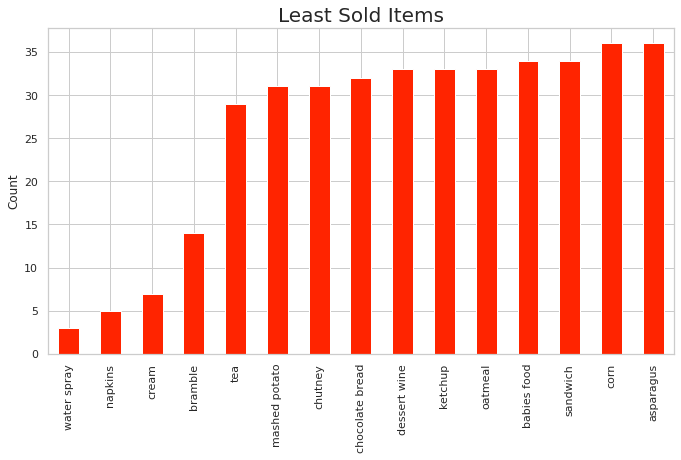

In [ ]:
ax = all_items.value_counts().nsmallest(15).plot(kind='bar')
ax.set_title('Least Sold Items', size=20)
ax.set_ylabel('Count');

## Basket sizes
A "basket" in this context refers to the set of unique items purchased in a single transaction.

A bulk of the transactions involved just a solitary item. In general, basket(transaction) frequency decreased with increase in basket size.

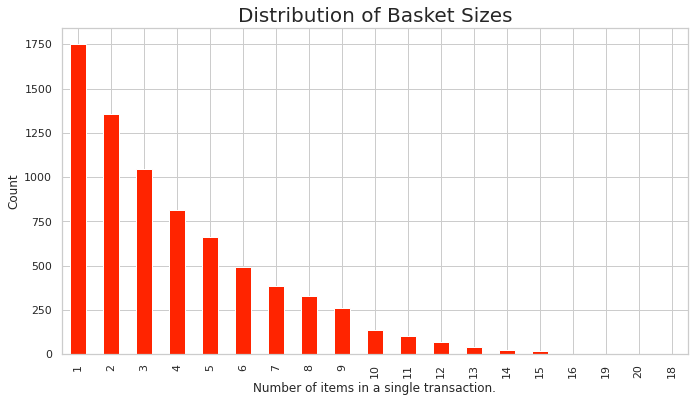

In [ ]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar()
ax.set_title('Distribution of Basket Sizes', size=20)
ax.set_ylabel('Count')
ax.set_xlabel('Number of items in a single transaction.');

## What's in the largest transactions?

In [ ]:
basket_sizes.nlargest(10)

0       20
1111    19
1120    19
1623    18
1604    16
1707    16
2358    16
2489    16
1186    15
1613    15
dtype: int64

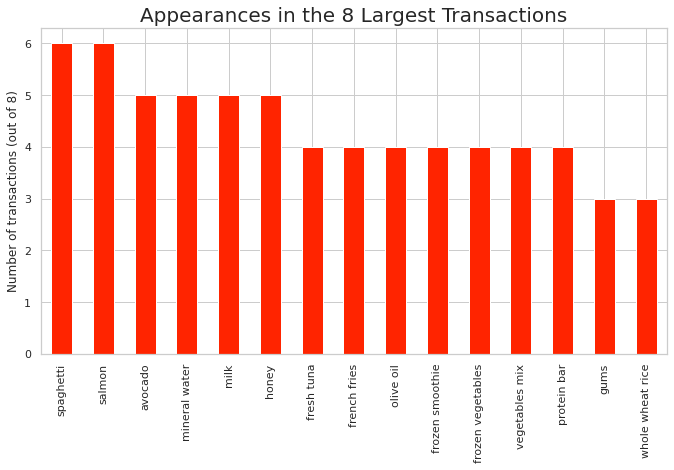

In [ ]:
largest_transactions = data[basket_sizes > 15]
items_in_largest_transactions = largest_transactions.melt()['value'].dropna()

ax = items_in_largest_transactions.value_counts().head(15).plot.bar()
ax.set_title('Appearances in the 8 Largest Transactions', size=20)
ax.set_ylabel('Number of transactions (out of 8)');

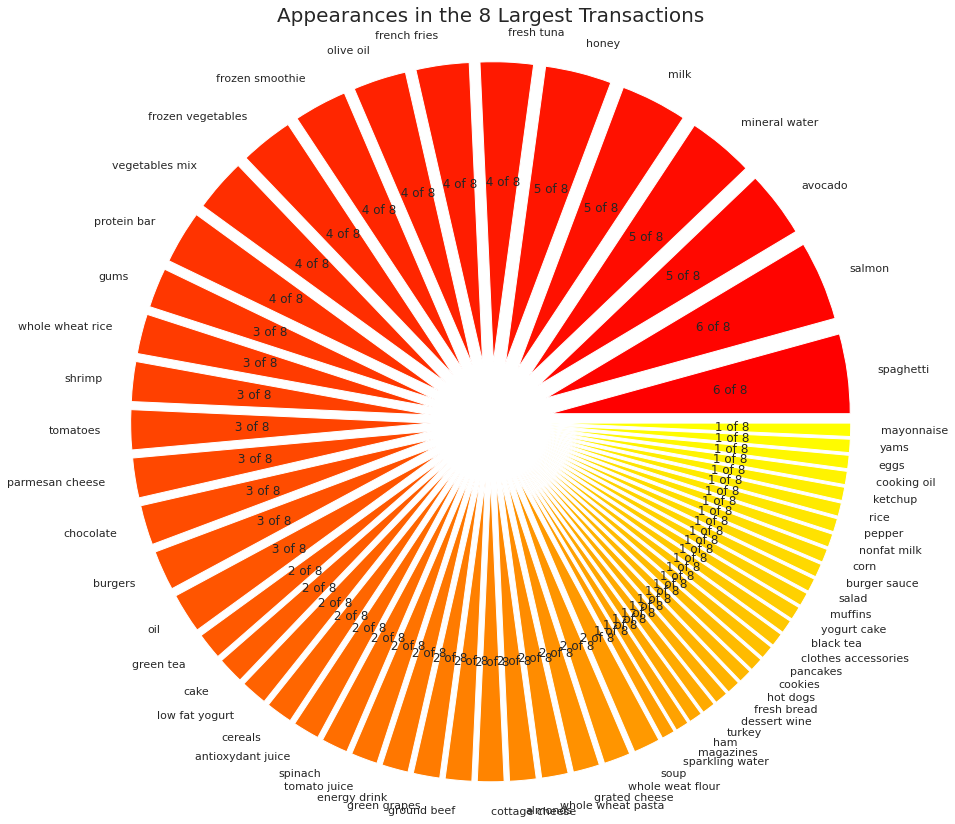

In [ ]:
pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(cmap='autumn', explode=[0.2] * 61, figsize=(12, 12),
                       autopct=lambda pct: f' {pct * 0.01 * pie_data.sum():.0f} of 8'
)
ax.set_title('Appearances in the 8 Largest Transactions', size=20, pad=25)
ax.set_ylabel('')
ax.figure.tight_layout();

## What's in the smallest transactions

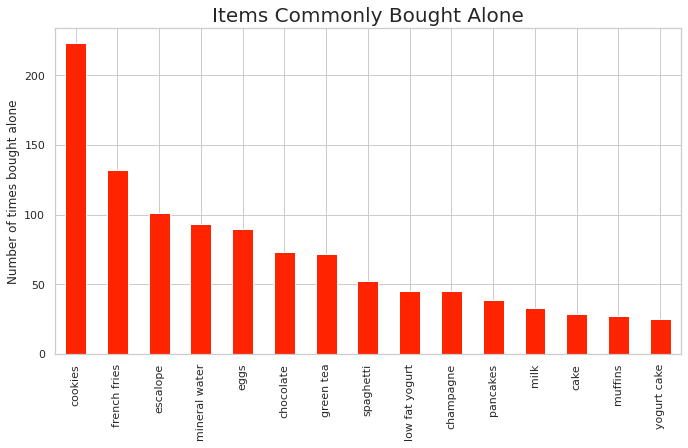

In [ ]:
single_items = data[basket_sizes == 1]['item_0'].value_counts()
ax = single_items.head(15).plot.bar()
ax.set_title('Items Commonly Bought Alone', size=20)
ax.set_ylabel('Number of times bought alone');

Cookies were the item most often bought alone.

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Dataset/market_basket/Market_Basket_Optimisation.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

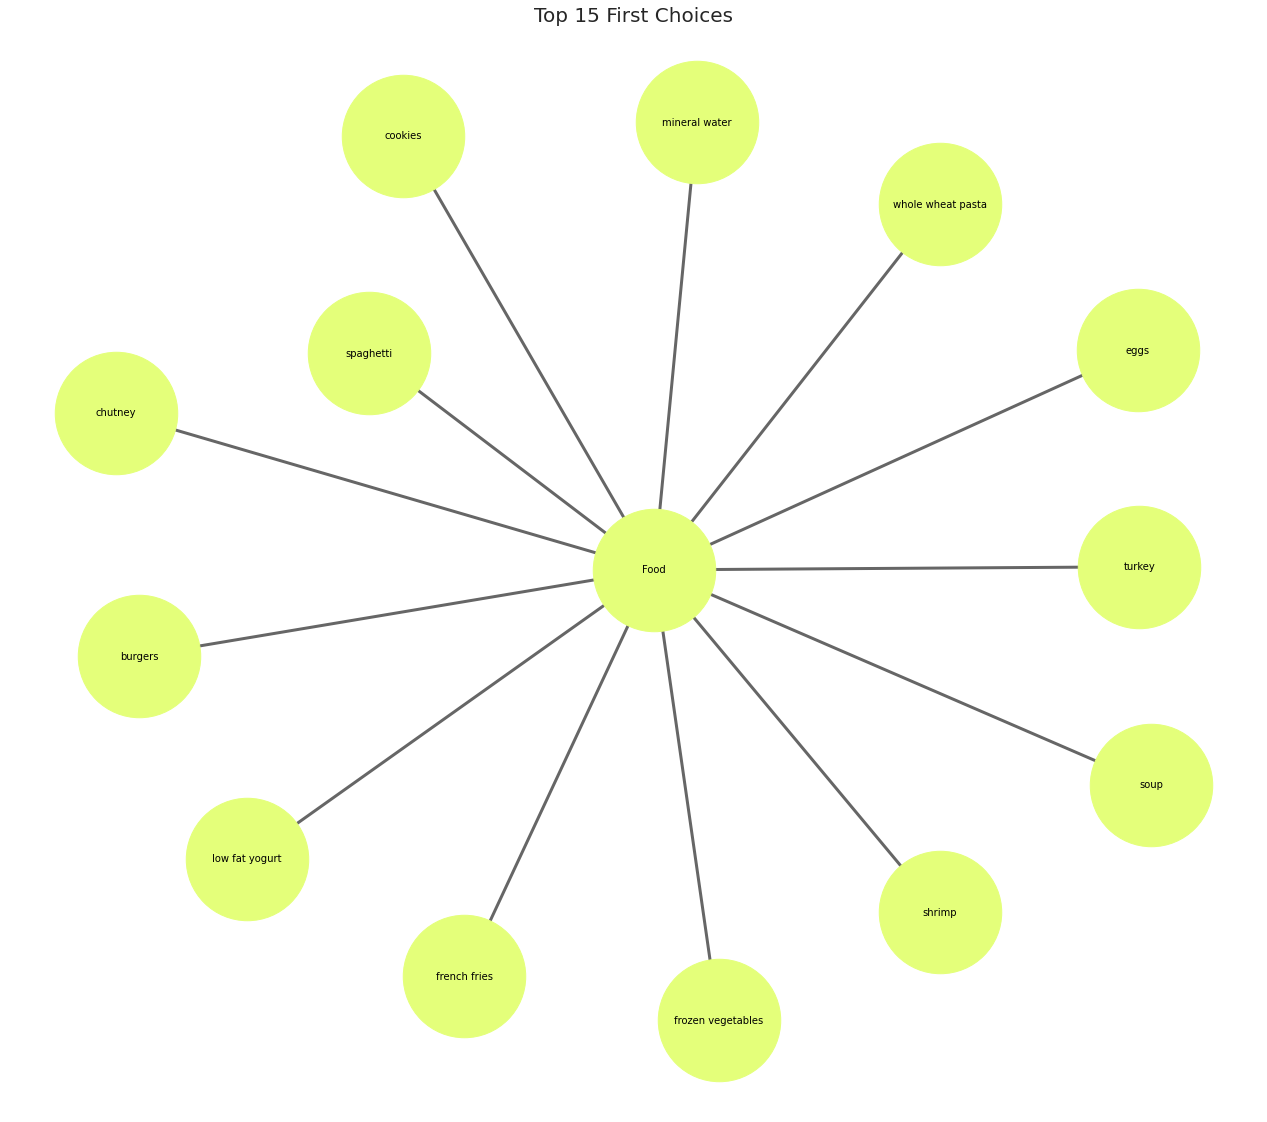

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 10, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [ ]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

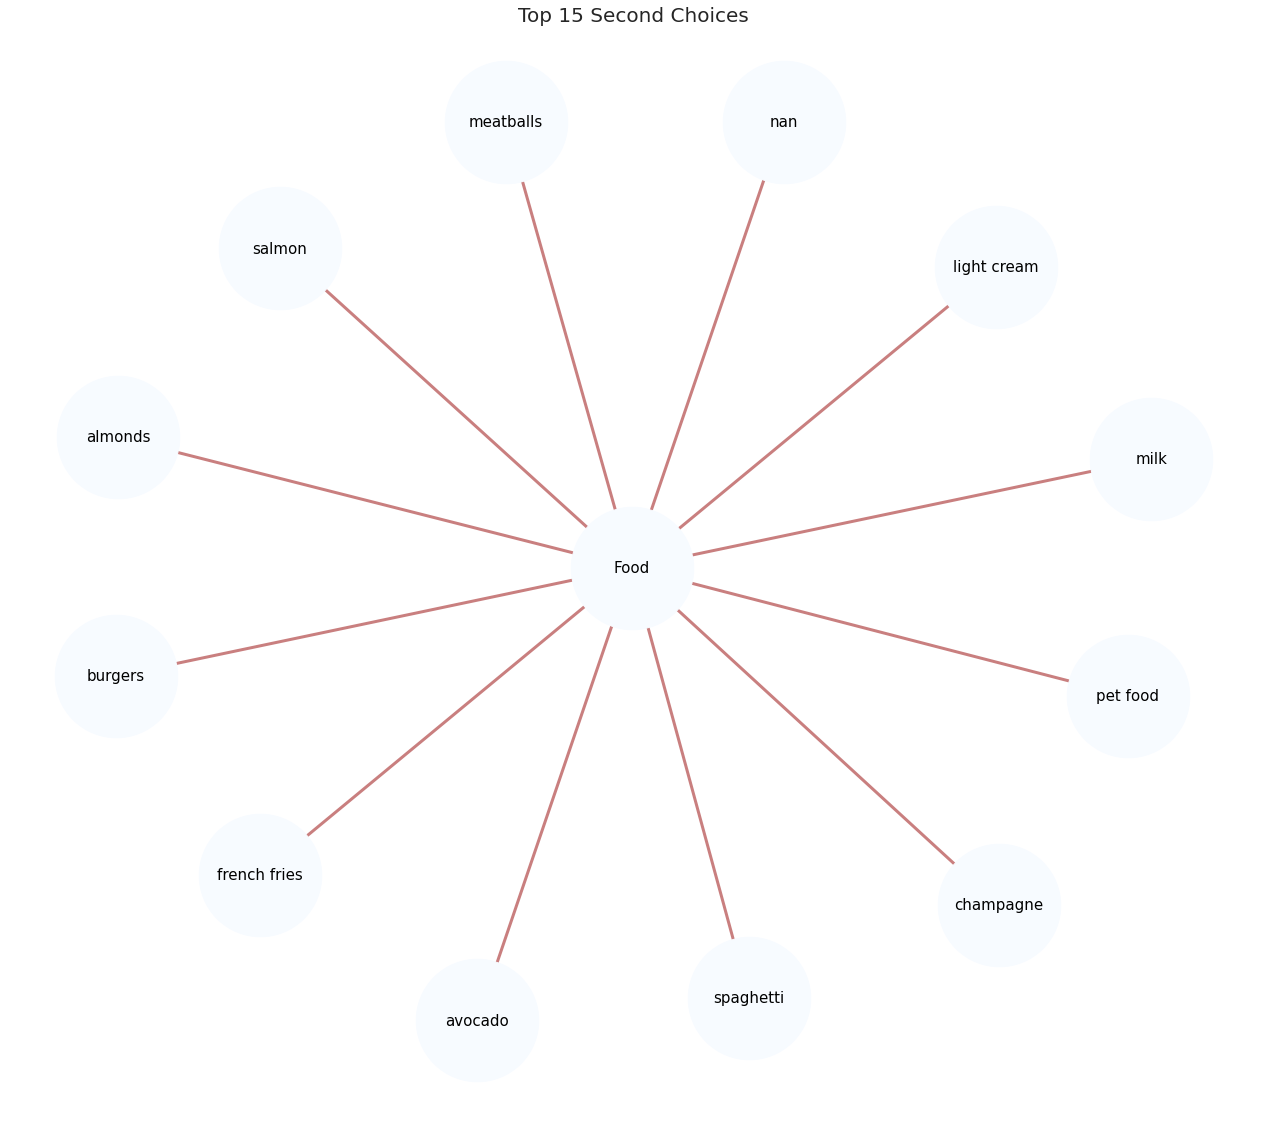

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 20)
plt.show()

In [ ]:
data['thirdchoice'] = 'Third Choice'
thirdchoice = data.truncate(before = -1, after = 10)
thirdchoice = nx.from_pandas_edgelist(thirdchoice, source = 'food', target = 2, edge_attr = True)

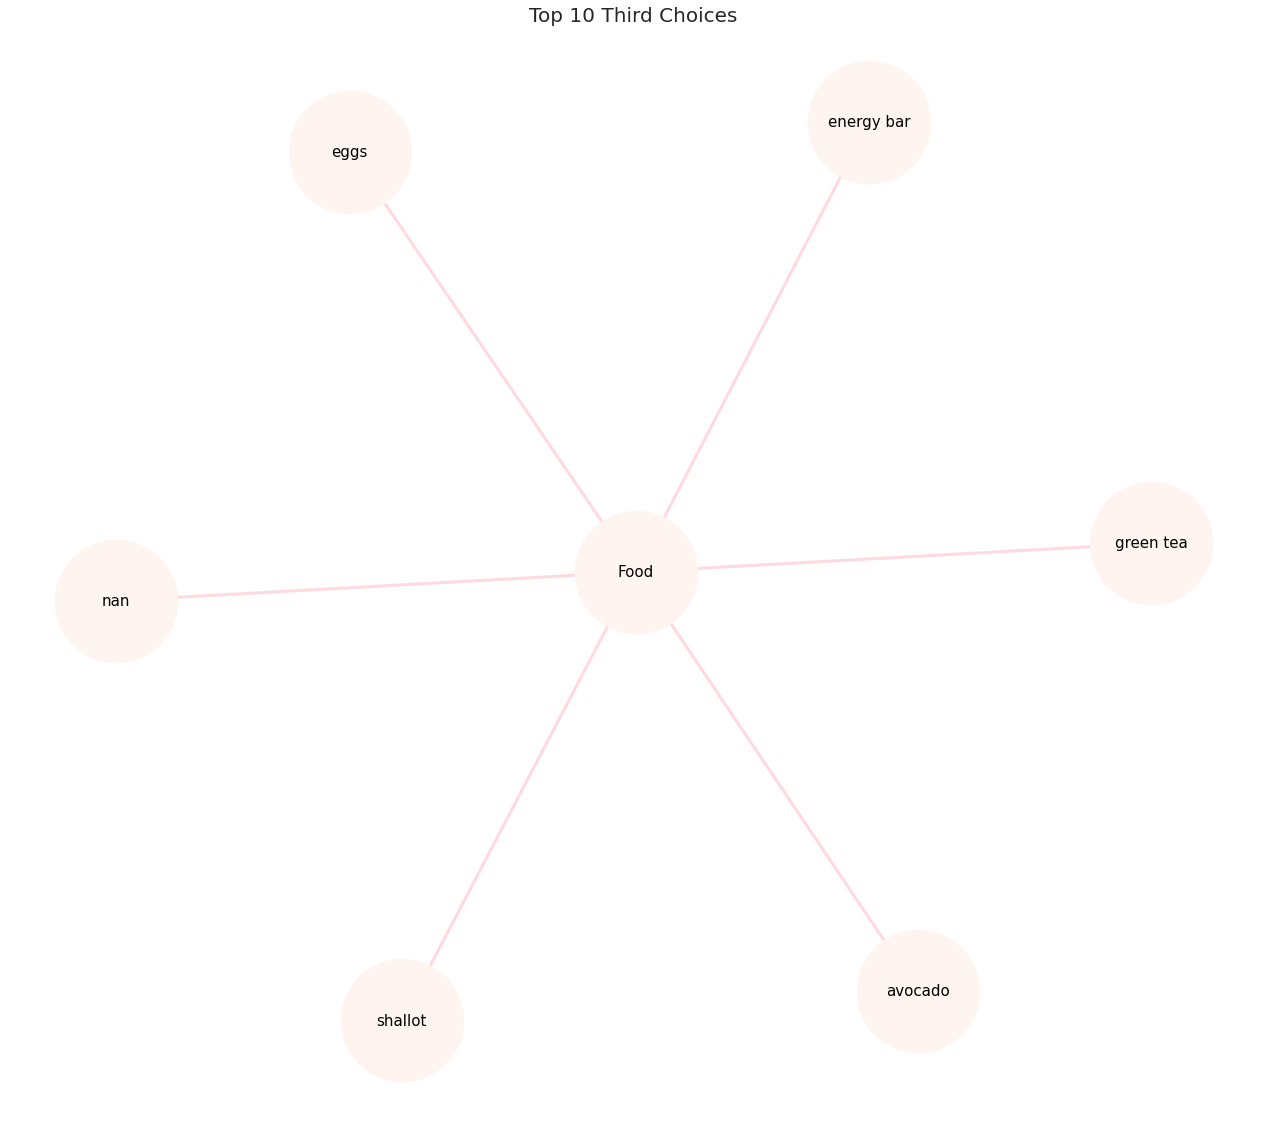

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(thirdchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(thirdchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(thirdchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(thirdchoice, pos, font_size = 15, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 20)
plt.show()

In [ ]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [ ]:
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [ ]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Applying apriori

How does Apriori Algorithm Work ?
A key concept in Apriori algorithm is the anti-monotonicity of the support measure. It assumes that

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too
Step 1: Create a frequency table of all the items that occur in all the transactions.

Step 2: We know that only those elements are significant for which the support is greater than or equal to the threshold support.

Step 3: The next step is to make all the possible pairs of the significant items keeping in mind that the order doesn’t matter, i.e., AB is same as BA.

Step 4: We will now count the occurrences of each pair in all the transactions.

Step 5: Again only those itemsets are significant which cross the support threshold

Step 6: Now let’s say we would like to look for a set of three items that are purchased together. We will use the itemsets found in step 5 and create a set of 3 items.

## Selecting and Filtering the Results

In [ ]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
204,0.010132,"(ground beef, eggs, mineral water)"
205,0.013065,"(milk, eggs, mineral water)"
206,0.011065,"(milk, ground beef, mineral water)"
207,0.010532,"(chocolate, spaghetti, eggs)"


In [ ]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [ ]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(spaghetti, mineral water)",2
26,0.050927,"(eggs, mineral water)",2


In [ ]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


## Association Mining

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(eggs, mineral water)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


# Sales Data Analysis

In [ ]:
all_data = pd.read_csv('/content/gdrive/My Drive/Dataset/market_basket/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

In [ ]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Get rid of text in order date column

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

## Make columns correct type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Add month column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Add city column

In [ ]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

range(1, 13)


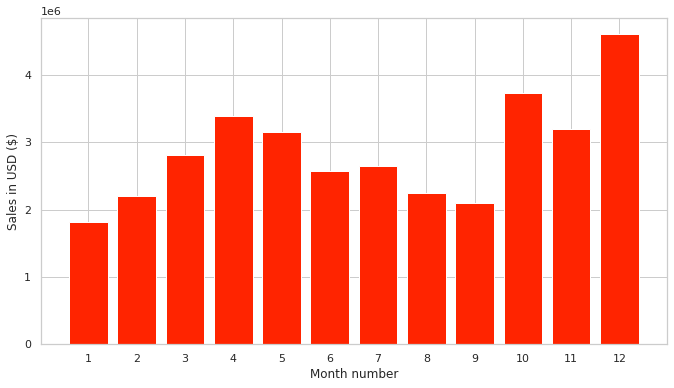

In [ ]:
months = range(1,13)
print(months)
plt.figure(figsize=(10,6))
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show();

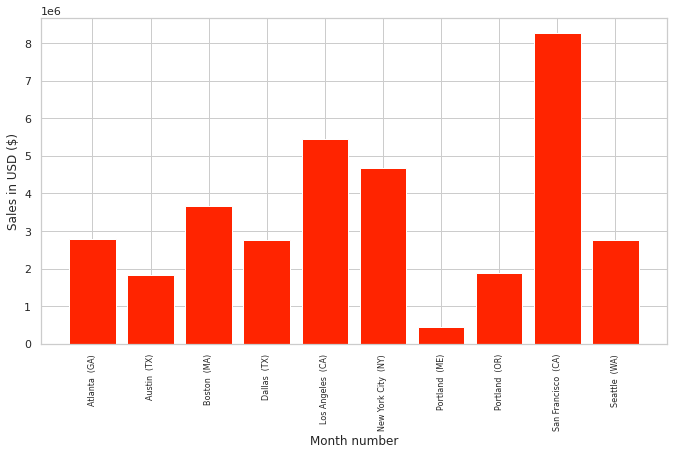

In [ ]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]
plt.figure(figsize=(10,6))
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


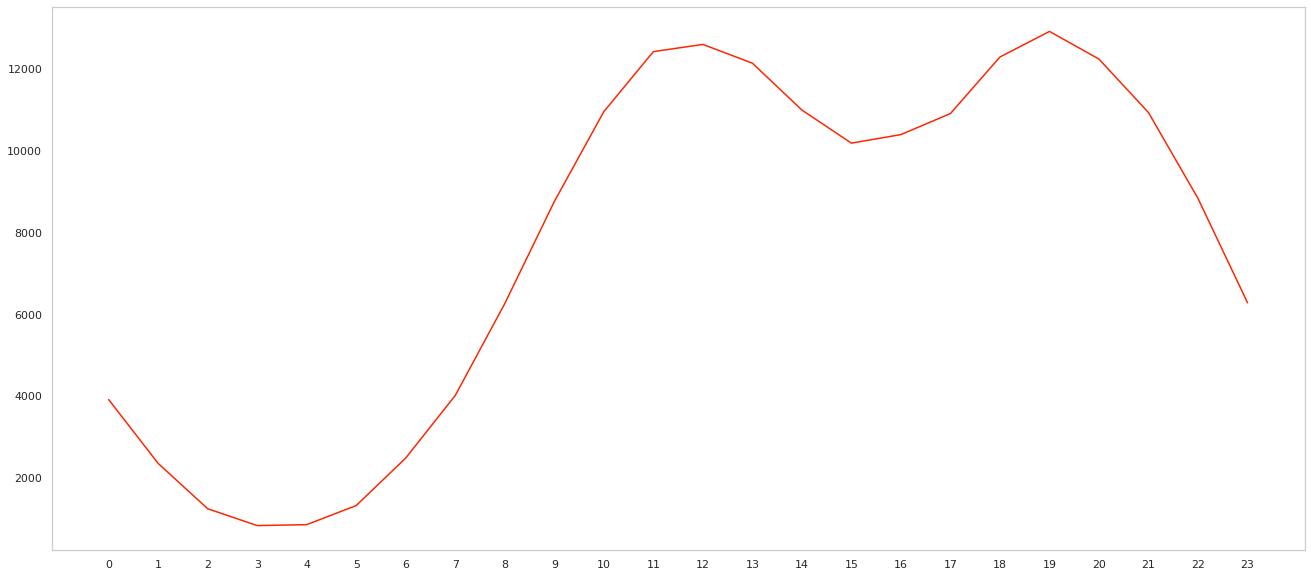

In [ ]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]
plt.figure(figsize=(20,10))
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

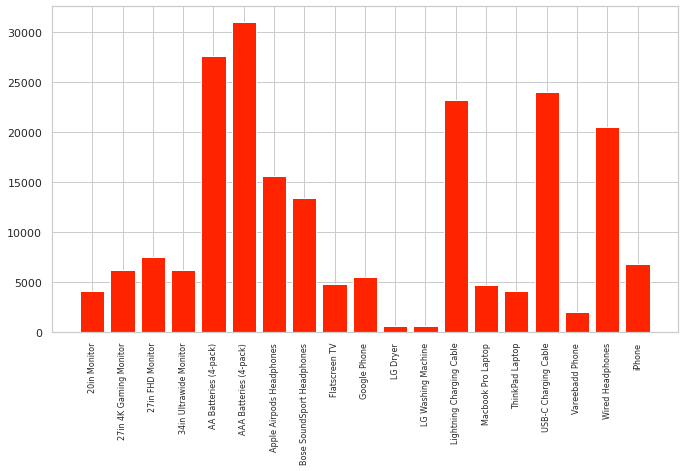

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.figure(figsize=(10,6))
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<Figure size 720x432 with 0 Axes>

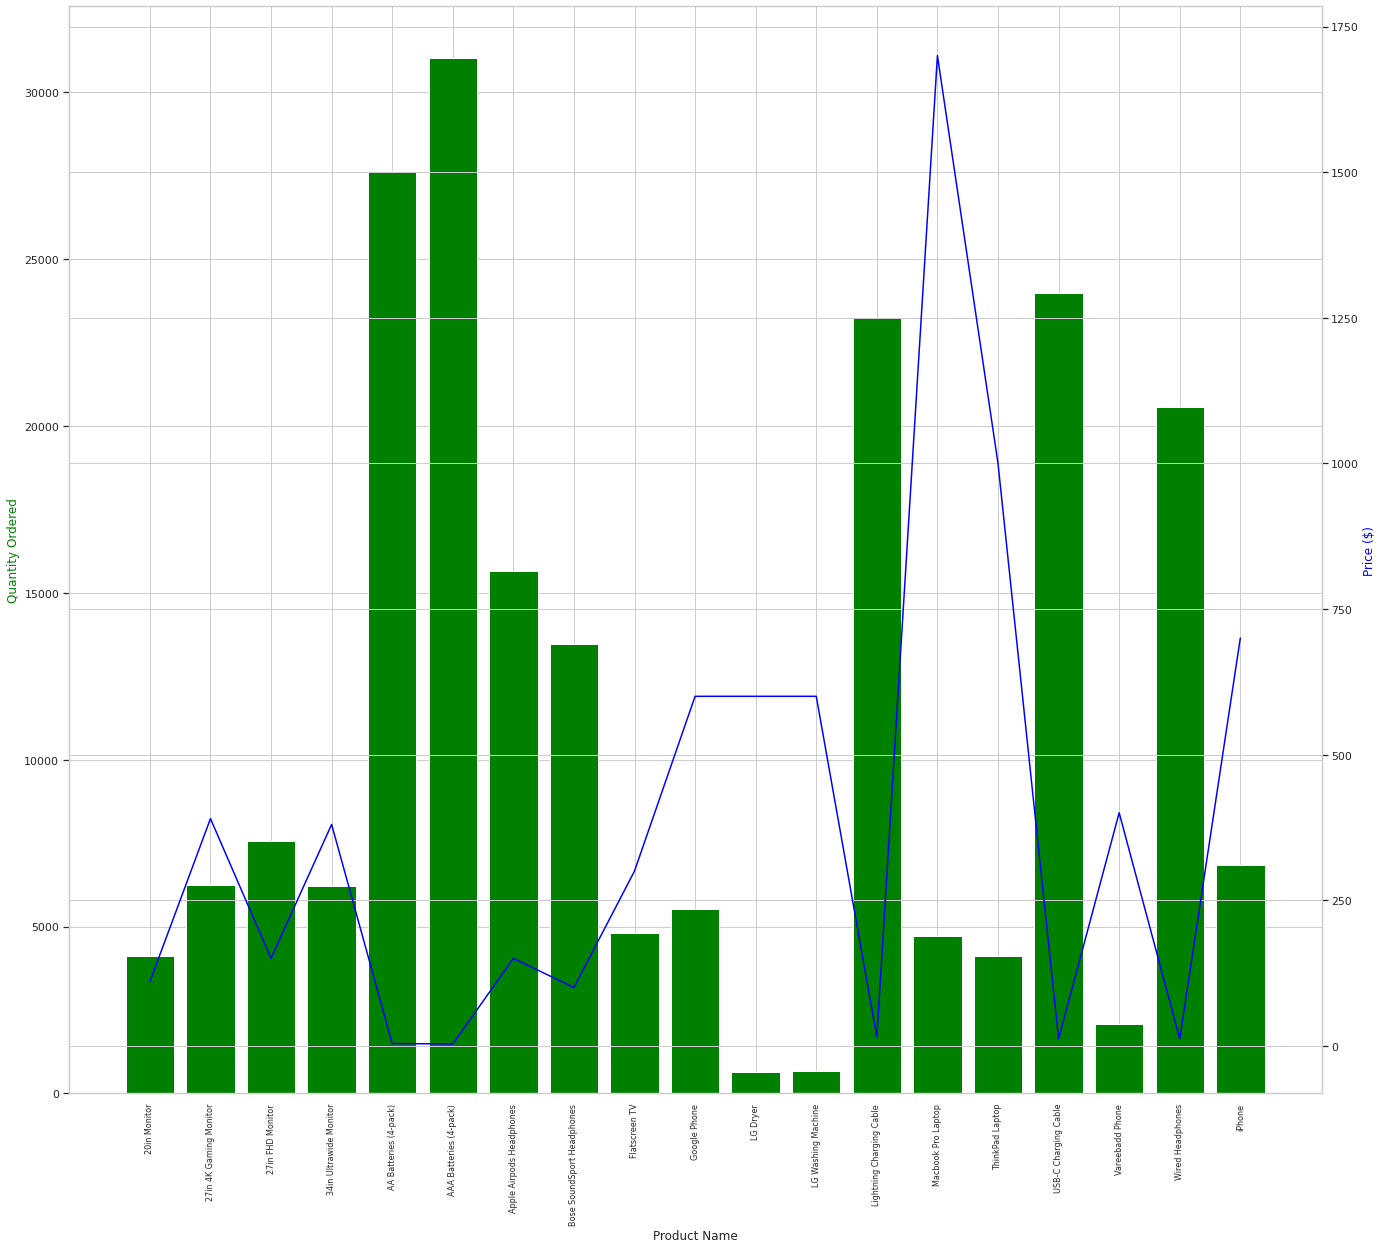

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# Product Recommendation

## Recommendation system part I: Product pupularity based system targetted at new customers

Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
amazon_ratings = pd.read_csv('/content/gdrive/My Drive/Dataset/market_basket/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


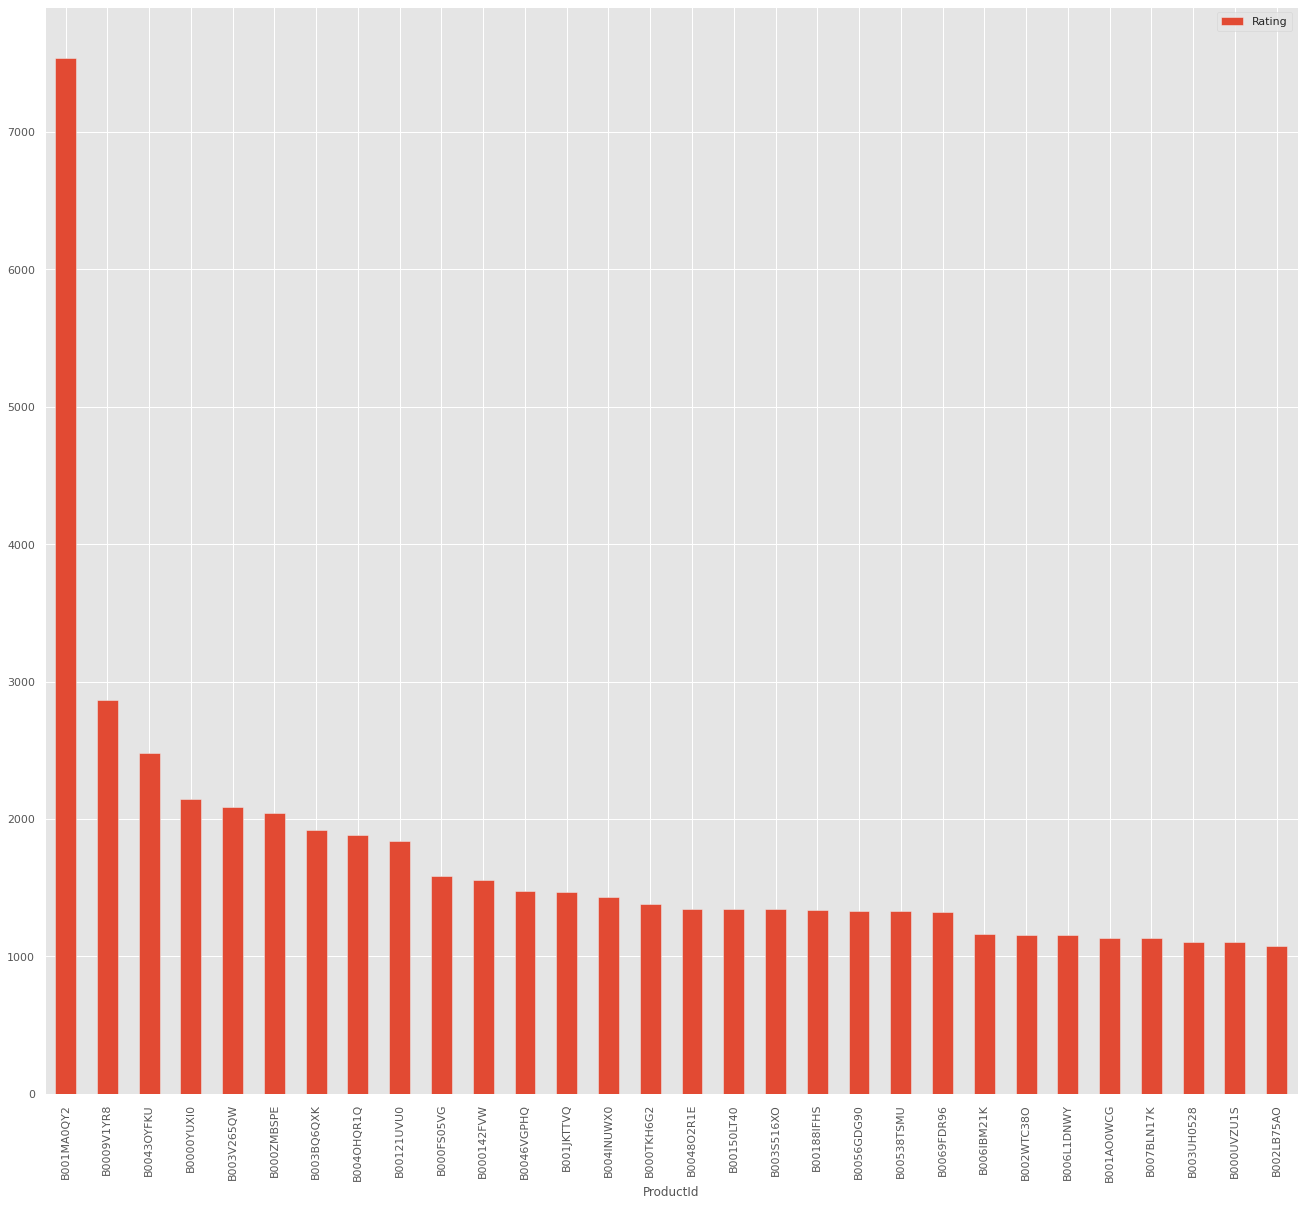

In [ ]:
most_popular.head(30).plot(kind = "bar")

## Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items



*   Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
*   A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.






In [ ]:
amazon_ratings1 = amazon_ratings.head(10000)

Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [ ]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

In [ ]:
X1 = X

Decomposing the Matrix

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

Correlation Matrix

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

Isolating Product ID # 6117036094 from the Correlation Matrix

Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [ ]:
X.index[99]

'6117036094'

In [ ]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

Recommending top 10 highly correlated products in sequence

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '1304146537',
 '1304168522',
 '1304482596',
 '1304488608',
 '1304495396',
 '130451112X',
 '1304622428',
 '1304651347']

## Recommendation system part III: When a business is setting up its e-commerce website for the first time without any product rating

For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
product_descriptions = pd.read_csv('/content/gdrive/My Drive/Dataset/market_basket/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [ ]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
product_descriptions1 = product_descriptions.head(10000)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Feature extraction from product descriptions

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<10000x61366 sparse matrix of type '<class 'numpy.float64'>'
	with 685786 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

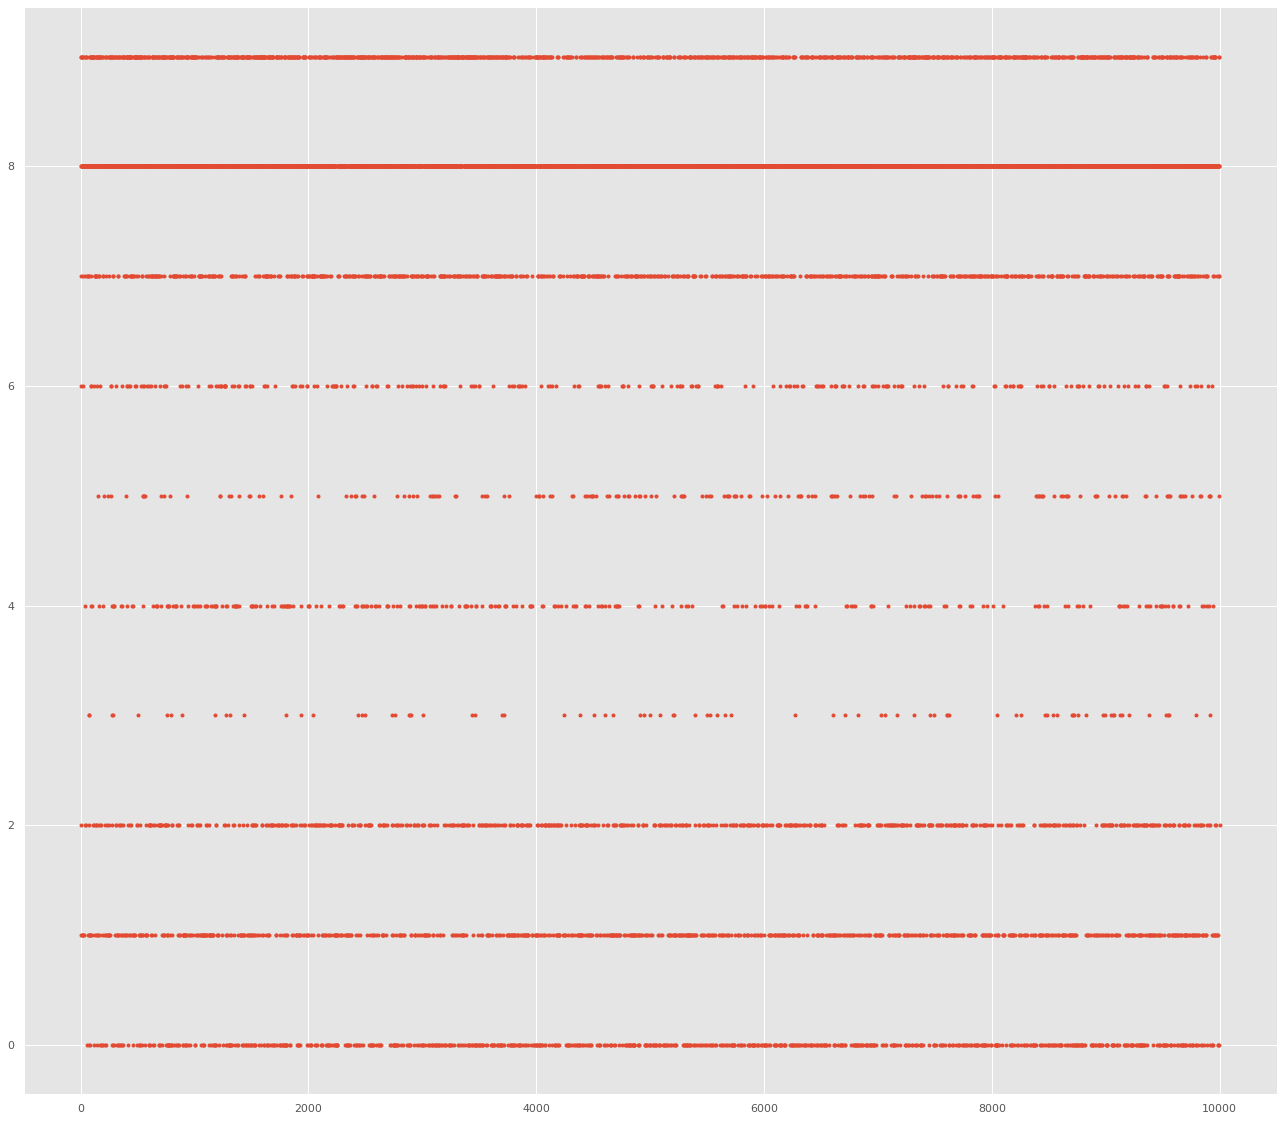

In [ ]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top words in each cluster based on product description

In [ ]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 battery
 volt
 lithium
 ion
 power
 tool
 speed
 batteries
 charger
 cordless
Cluster 1:
 tile
 indoor
 thinset
 recommended
 frost
 commercial
 residential
 wall
 pieces
 piece
Cluster 2:
 water
 valve
 pressure
 pipe
 pvc
 tank
 heater
 hot
 faucet
 spray
Cluster 3:
 ft
 easy
 use
 steel
 design
 air
 designed
 home
 used
 features
Cluster 4:
 cabinet
 vanity
 storage
 shelf
 drawer
 sink
 finish
 hardware
 shelves
 easy
Cluster 5:
 paint
 wood
 proposition
 65
 residents
 nbsp
 california
 concrete
 ft
 finish
Cluster 6:
 light
 bulb
 energy
 watt
 led
 hours
 lighting
 incandescent
 bulbs
 white
Cluster 7:
 fan
 light
 ceiling
 watt
 glass
 fixture
 home
 bulbs
 shade
 finish
Cluster 8:
 door
 doors
 glass
 steel
 shower
 security
 garage
 opening
 installation
 hardware
Cluster 9:
 patio
 fabric
 table
 outdoor
 grill
 chairs
 weather
 frame
 cushions
 dining


In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("cutting tool")

Cluster 0:
 battery
 volt
 lithium
 ion
 power
 tool
 speed
 batteries
 charger
 cordless


In [ ]:
show_recommendations("dining")

# Monte Carlo

In [ ]:
!pip install --upgrade xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import style
from scipy.stats import norm

# Styles
style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['font.family'] = 'Georgia'
plt.rcParams['font.size'] = 18

In [ ]:
# Functions
#https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [ ]:
# Load Data
df = pd.read_excel("/content/gdrive/My Drive/Dataset/market_basket/Sample - Superstore.xls")
df = df.set_index('Order Date')
sales = df['Sales'].resample('W').sum()

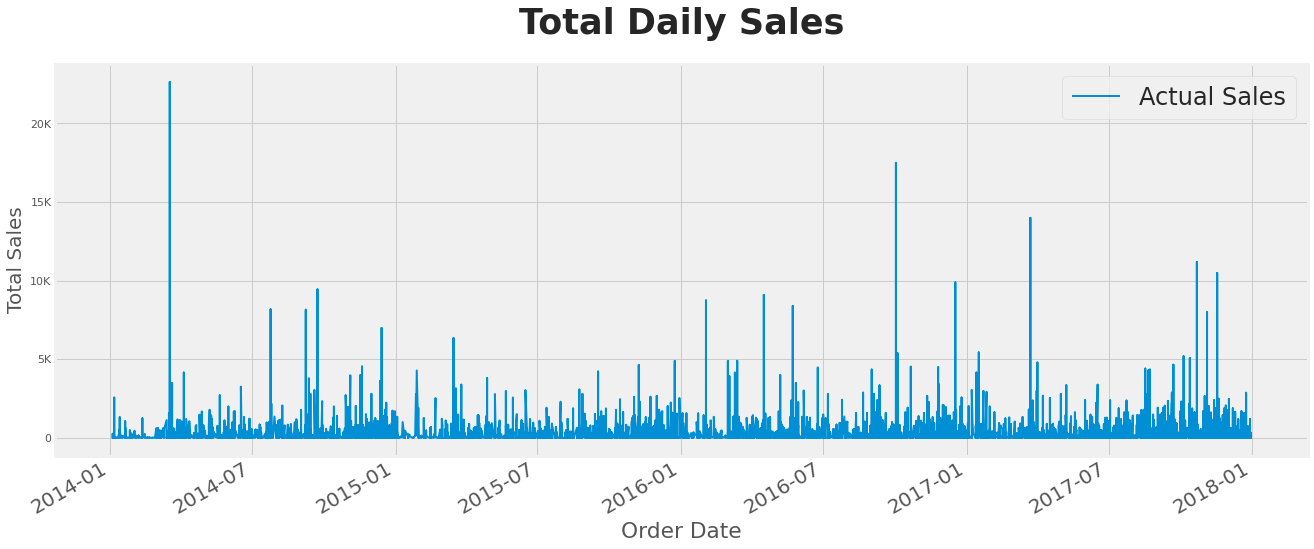

In [ ]:
# Sales
smoothed = sales.rolling(window=6).mean()
smoothed = smoothed.dropna()

fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Total Daily Sales', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Sales', fontsize=20)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

for t in ax.xaxis.get_major_ticks():
    t.label.set_fontsize(20) 

df['Sales'].plot(ax=ax, linewidth=2, label="Actual Sales")
ax.legend(fontsize=24)

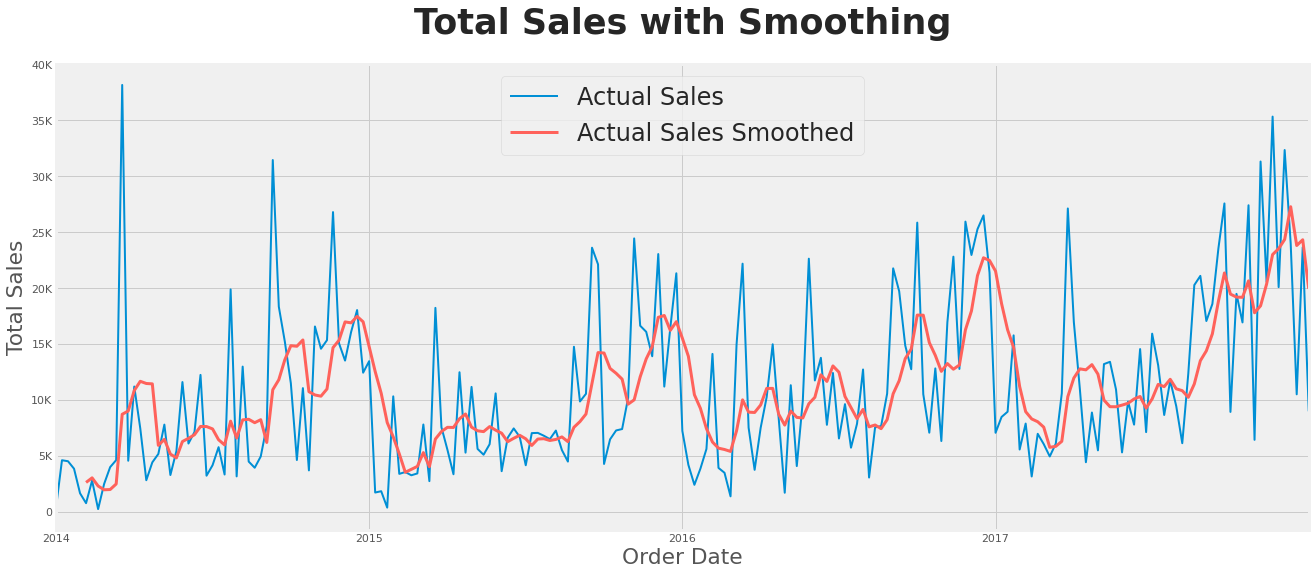

In [ ]:
# Total Sales with Smoothing
smoothed = sales.rolling(window=6).mean()
smoothed = smoothed.dropna()

fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Total Sales with Smoothing', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Sales')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

sales.plot(ax=ax, linewidth=2, label="Actual Sales")
smoothed.plot(ax=ax, linewidth=3, color='#FF625B', label="Actual Sales Smoothed")
#ax.legend([plt1, plt2], ['Actual Sales', 'Actual Sales Smoothed'])
ax.legend(fontsize=24)

Text(0.5, 1.0, 'Distribution of Weekly Sales')

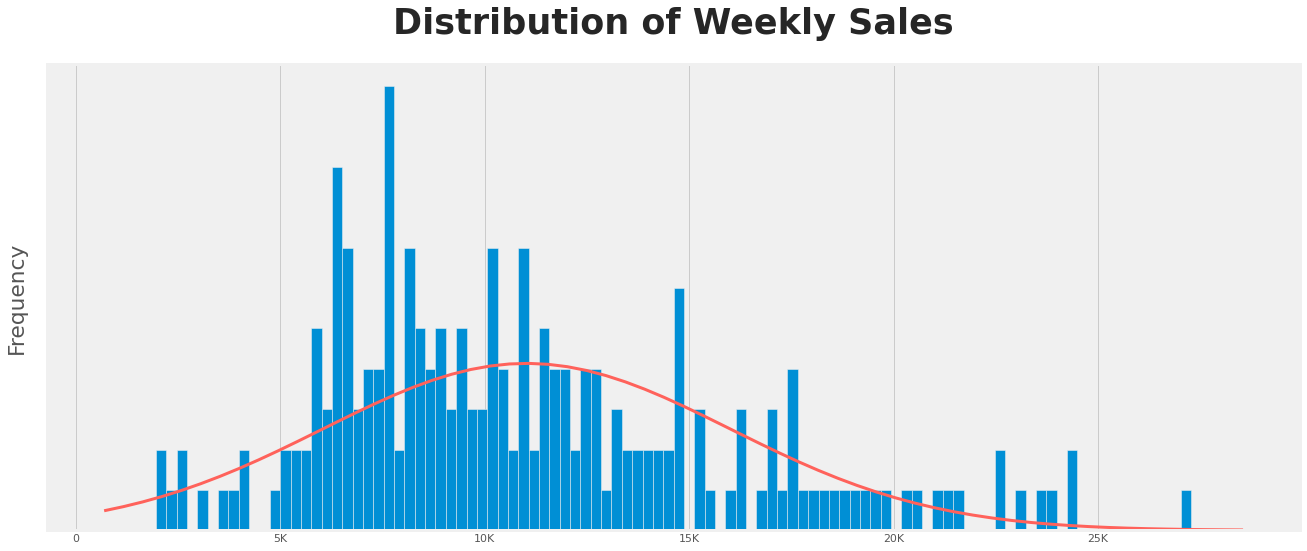

In [ ]:
# Distribution of Weekly Sales
fig, ax = plt.subplots(figsize=(20,8))

smoothed.plot.hist(bins=100, density=True, ax=ax)

# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, smoothed.mean(), smoothed.std())
ax.plot(x, p, color='#FF625B', linewidth=3)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

ax.set_yticks([])
ax.set_ylabel('Frequency', labelpad=20)
ax.set_title('Distribution of Weekly Sales', fontsize=35, fontweight='bold', pad=30)

Text(0.5, 1.05, 'Simulate Random Walks')

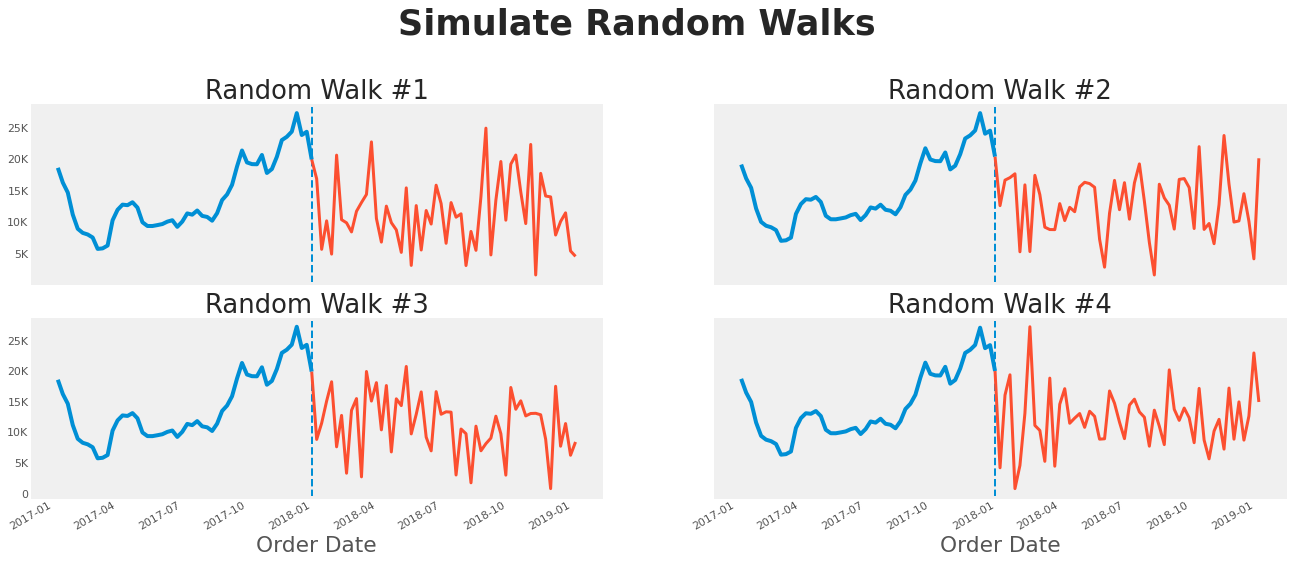

In [ ]:
# A random walk
last_sale = smoothed[-1]
num_weeks = 53

mu = smoothed.mean()
std = smoothed.std()

index = pd.date_range('2017-12-31', periods=54, freq='W')

def make_sim_plot(ax=ax, title=''):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std)
        if weekly_sales < 0:
            weekly_sales = 0
        sales_series.append(weekly_sales)
    s = pd.Series(sales_series, index=index)
    ax.set_title(title)
    ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
    ax.axvline(x=s.index.min(), linestyle='dashed', linewidth=2)

    smoothed[-52:].plot(ax=ax)
    s.plot(ax=ax, linewidth=3)

    
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20,8))

make_sim_plot(ax1, title='Random Walk #1')
make_sim_plot(ax2, title='Random Walk #2')
make_sim_plot(ax3, title='Random Walk #3')
make_sim_plot(ax4, title='Random Walk #4')
ax2.set_yticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_xlabel('')
ax1.set_xticks([])
ax1.set_xlabel('')

ax1.grid(None)
ax2.grid(None)
ax3.grid(None)
ax4.grid(None)

fig.suptitle('Simulate Random Walks', fontsize=35, fontweight='bold', y=1.05)

Text(0.5, 0.98, 'Simulations of 1,000 Random Walks')

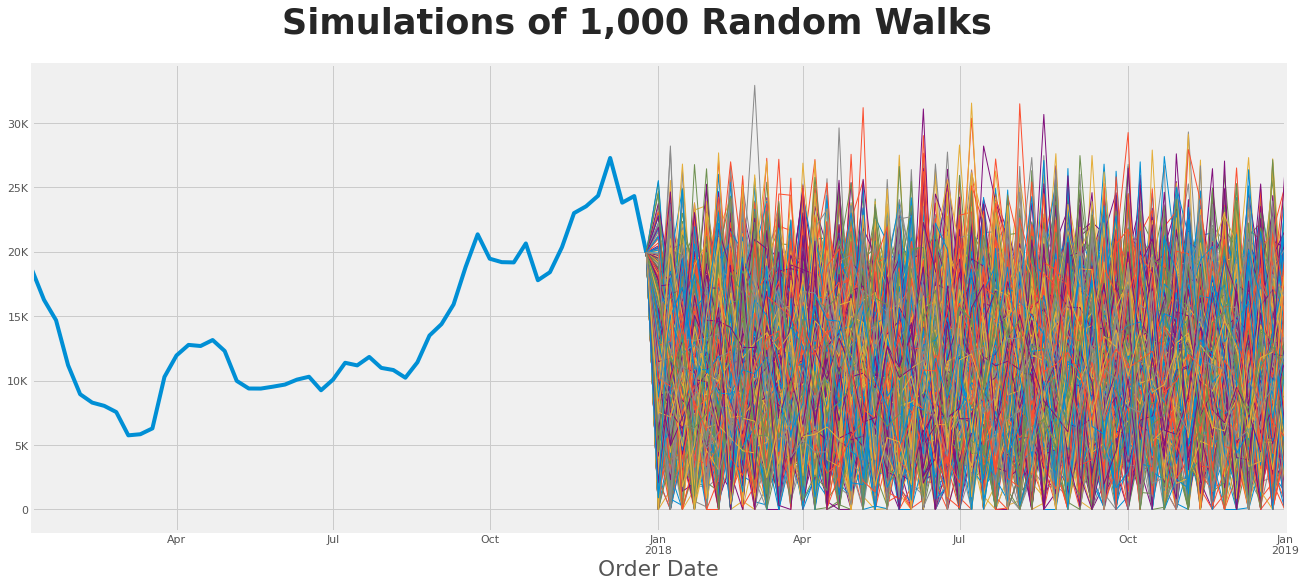

In [ ]:
# Many, many random walks
num_simulations = 1000
num_weeks = 53

last_sale = smoothed[-1]
mu = smoothed.mean()
std = smoothed.std()

index = pd.date_range('2017-12-31', periods=54, freq='W')

simulation_df = pd.DataFrame()

sales_2018 = []

for sim in range(num_simulations):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std)
        if weekly_sales < 0:
            weekly_sales = 0
        sales_series.append(weekly_sales)
    
    sales_2018.append(np.sum(sales_series))
    simulation_df[sim] = sales_series

simulation_df.index = index

fig, ax = plt.subplots(figsize=(20,8))
smoothed[-52:].plot(ax=ax)
simulation_df.plot(ax=ax, legend=False, linewidth=1)

ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Simulations of 1,000 Random Walks', fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'Total 2018 Sales Simulation')

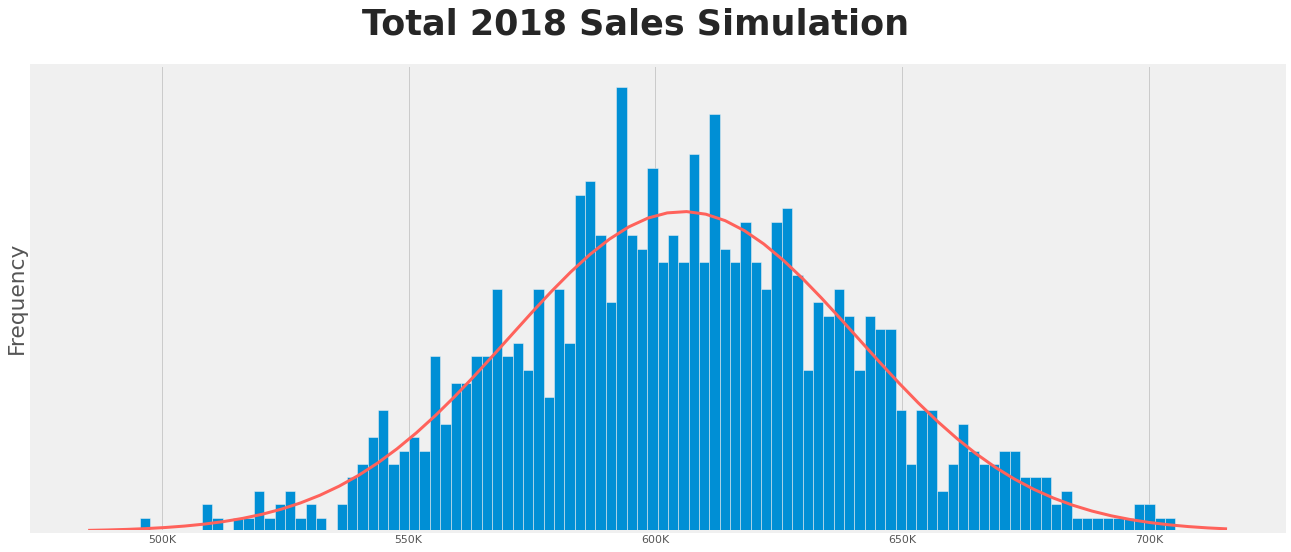

In [ ]:
#Random walk total sales

fig, ax = plt.subplots(figsize=(20,8))
simulations_2018 = pd.Series(data=sales_2018)
simulations_2018.plot.hist(bins=100, ax=ax, density=True)

# Plot the pdf
xmin, xmax = plt.xlim()
mean = simulations_2018.mean()
std = simulations_2018.std()

x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mean, std)
ax.plot(x, p, color='#FF625B', linewidth=3)
ax.set_yticks([])
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Total 2018 Sales Simulation', fontsize=35, fontweight='bold')

Text(0.5, 0.98, '2018 Total Sales Normal Distribution')

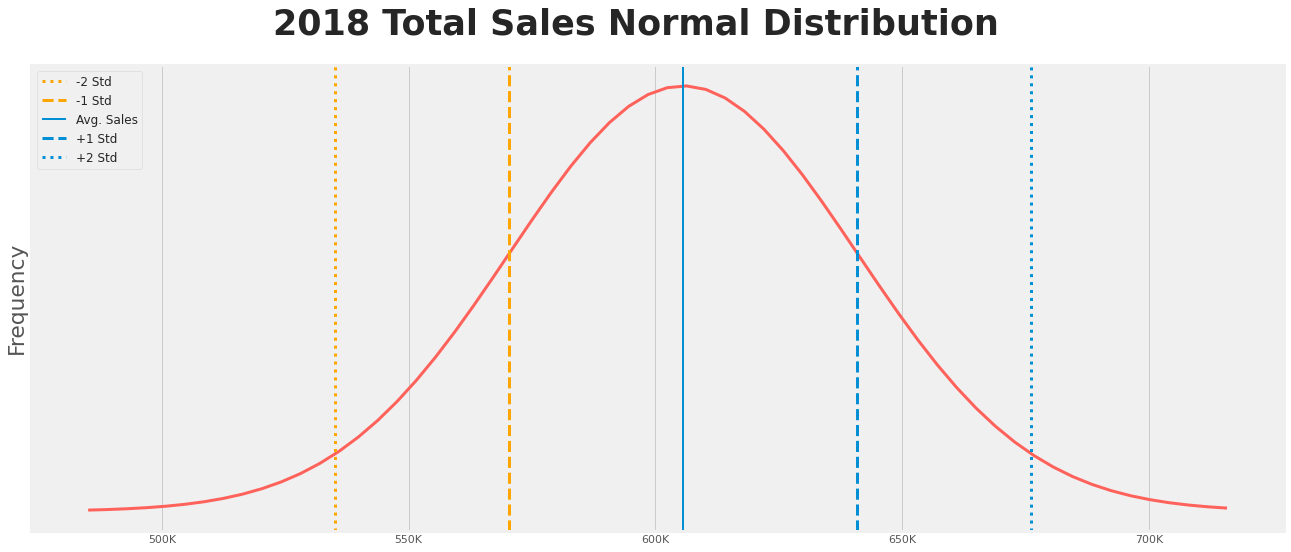

In [ ]:
# 2018 Sales normal distribution
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, p, color='#FF625B', linewidth=3)

ax.set_yticks([])
ax.set_ylabel('Frequency')

ax.axvline(mean - (std * 2), linewidth=3, label='-2 Std', linestyle='dotted', color='orange')
ax.axvline(mean - std, linewidth=3, label='-1 Std', linestyle='dashed', color='orange')
ax.axvline(mean, linewidth=2, label="Avg. Sales")
ax.axvline(mean + std, linewidth=3, label='+1 Std', linestyle='dashed')
ax.axvline(mean + (std * 2), linewidth=3, label='+2 Std', linestyle='dotted')

ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.legend(fontsize=12, loc='upper left')
fig.suptitle('2018 Total Sales Normal Distribution', fontsize=35, fontweight='bold')

In [ ]:
# Ask Questions

from scipy.stats import norm
#mean + std * norm.
#mean + (std * norm.ppf(.25))
print("It's highly likely that you sales will be between ${:,.0f} and ${:,.0f}.".format(mean + (2 * -std), mean + (2 * std)))
print("There's a 25% chance that sales will be less than {:,.0f}.".format(mean + (std * norm.ppf(.25))))

It's highly likely that you sales will be between $535,178 and $676,111.
There's a 25% chance that sales will be less than 581,880.
